# Seguimiento 6 - Santiago Valencia García - A00395902

## Carga de datos:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('winequality.csv')

df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Eliminación y comprobación de datos nulos:

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


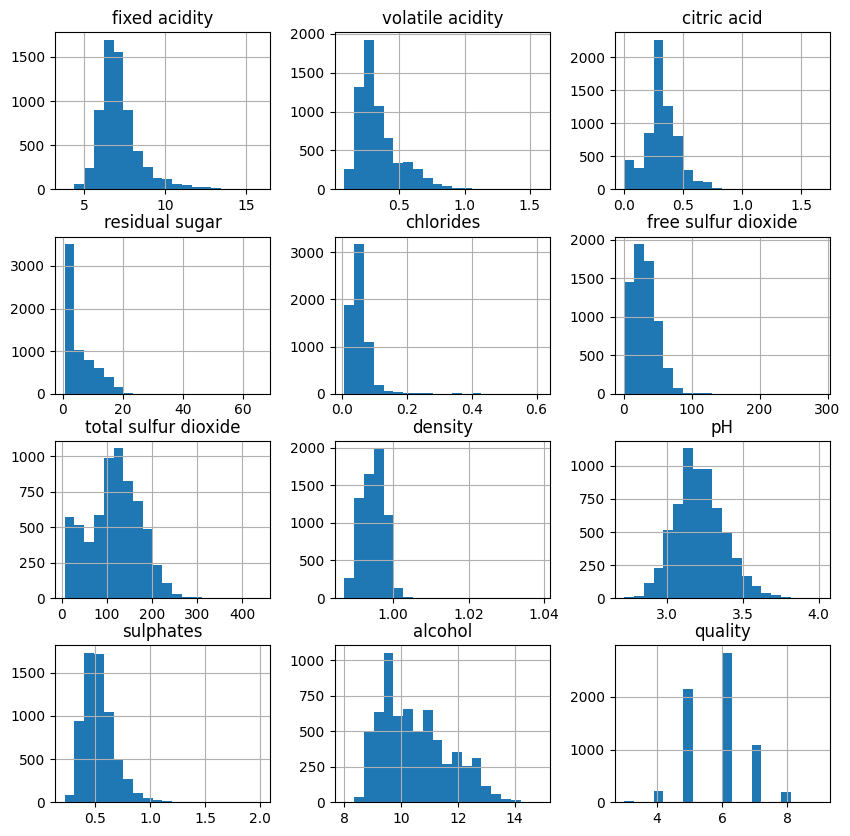

In [ ]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

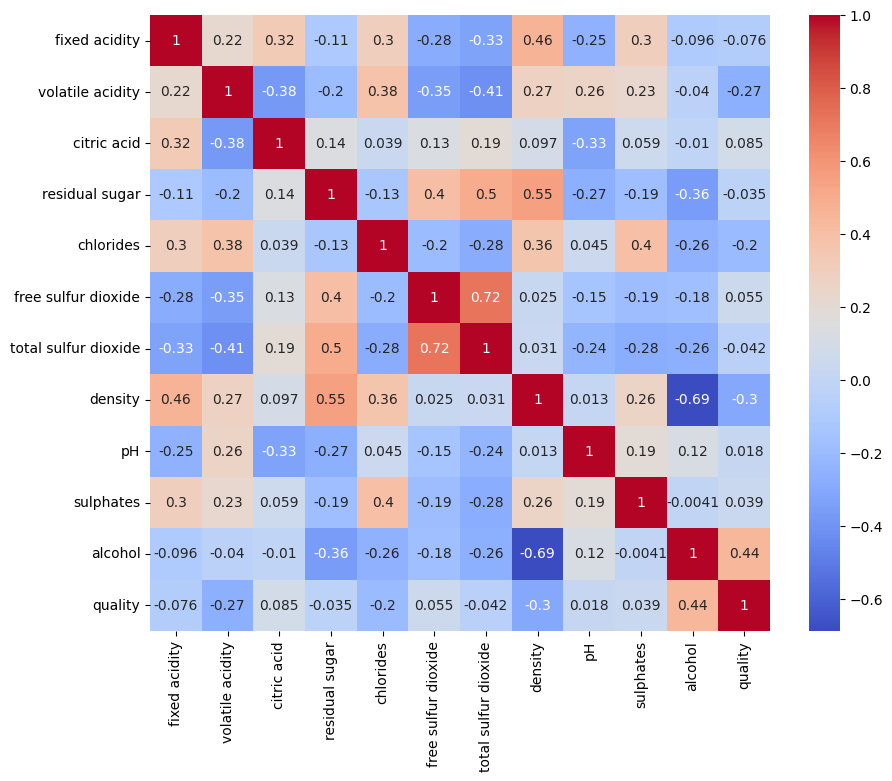

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Escalamiento de datos con MinMaxScaler

In [ ]:
df = df.drop(columns=['type'])
df = df.dropna()

# Separar las características y la variable objetivo
X = df.drop(columns=['quality'])  # Características
y = df['quality']  # Variable objetivo

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



## División de los datos (70% para entrenamiento y 30% para prueba)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle=True, random_state=1234)

## Entrenamiento del MLPClassifier:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (train): 0.5714
Accuracy (test): 0.5441
Kappa (train): 0.3124
Kappa (test): 0.2786


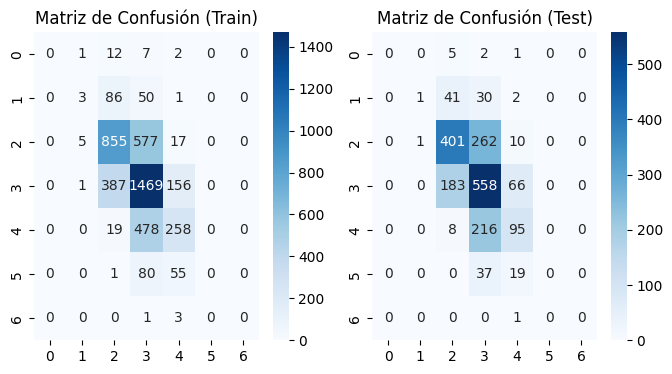

In [ ]:

mlp = MLPClassifier(random_state=42)

mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

kappa_train = cohen_kappa_score(y_train, y_train_pred)
kappa_test = cohen_kappa_score(y_test, y_test_pred)

print(f'Accuracy (train): {accuracy_train:.4f}')
print(f'Accuracy (test): {accuracy_test:.4f}')
print(f'Kappa (train): {kappa_train:.4f}')
print(f'Kappa (test): {kappa_test:.4f}')

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Train)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Test)')

plt.show()

In [36]:
# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40), (100, 50, 30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, n_jobs=-1, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

best_mlp = grid_search.best_estimator_

y_train_pred_best = best_mlp.predict(X_train)
y_test_pred_best = best_mlp.predict(X_test)

accuracy_train_best = accuracy_score(y_train, y_train_pred_best)
accuracy_test_best = accuracy_score(y_test, y_test_pred_best)

kappa_train_best = cohen_kappa_score(y_train, y_train_pred_best)
kappa_test_best = cohen_kappa_score(y_test, y_test_pred_best)

precision_test_best = precision_score(y_test, y_test_pred_best, average='micro')
f1_test_best = f1_score(y_test, y_test_pred_best, average='micro')

print(f'Best Accuracy (train): {accuracy_train_best:.4f}')
print(f'Best Accuracy (test): {accuracy_test_best:.4f}')
print(f'Best Kappa (train): {kappa_train_best:.4f}')
print(f'Best Kappa (test): {kappa_test_best:.4f}')
print("Best Precision (test) = ", precision_test_best)
print("Best F1-score (test) = ", f1_test_best)

conf_matrix_train_best = confusion_matrix(y_train, y_train_pred_best)
conf_matrix_test_best = confusion_matrix(y_test, y_test_pred_best)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_best, annot=True, fmt='d', cmap='Blues')
plt.title('Best Matriz de Confusión (Train)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_best, annot=True, fmt='d', cmap='Blues')
plt.title('Best Matriz de Confusión (Test)')

plt.show()


KeyboardInterrupt: 

### Análisis:

Los resultados obtenidos del MLPClassifier muestran que el modelo inicial proporcionó un accuracy y un Kappa relativamente bajos, lo que sugiere una clasificación insatisfactoria de la calidad del vino. Sin embargo, tras implementar GridSearchCV para optimizar los hiperparámetros, se observó una mejora en ambas métricas, indicando un modelo más preciso y confiable. La matriz de confusión reveló que el modelo ajustado logró reducir el número de falsas predicciones, especialmente en clases críticas como la calidad alta y baja del vino.